## Desafios

1. Automatize o processo construção dos pares de pontos. Para isso, crie uma função que recebe uma foto e devolve as coordenadas dos quatro cantos do documento;
2. Implemente uma interface gráfica para o seu programa de retificação automática de documentos. Requisitos:
    1. Permitir a seleção do arquivo de entrada;
    2. Permitir o ajuste manual dos cantos detectados na foto;
    3. Permitir a seleção da resolução do arquivo final;
    4. Salvar o documento retificado em um arquivo.
    
  O OpenCV possui funções para criar uma interface gráfica simples. Você pode utilizá-las para implementar seu programa.
    
  **A conclusão satisfatória deste desafio vale até 1 ponto adicional na nota do projeto 4.** Para ganhar até meio ponto a seleção do arquivo de entrada pode ser feita na linha de comando do terminal e a interface gráfica pode ser implementada utilizando somente o OpenCV. Para valer até um ponto é necessário implementar uma interface gráfica completa (para seleção dos arquivos e ajuste dos cantos do documento).

# Aula 02

## Homografias

Nesta aula introduziremos o conceito de homografias. Para isso utilizaremos uma aplicação de exemplo: retificação de fotos de documentos.

Considere inicialmente a imagem a seguir:

<img src="foto-documento.jpg" alt="Foto de um documento" style="width: 500px;"/>

O objetivo da retificação de documentos é obter a imagem a seguir:

<img src="documento.jpg" alt="Foto de um documento" style="width: 500px;"/>

## Estimação de homografias

Uma homografia é definida pela matriz:

$$
H = \begin{pmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33} \\
\end{pmatrix}$$

Considere a correspondência de pontos $(p_i, p'_i)$, onde $p_i = (x_i, y_i, 1)^T$ é a coordenada de um ponto na imagem original e $p'_i = (x'_i, y'_i, 1)^T$ é a coordenada correspondente na imagem de destino. Como vimos em aula, é comum utilizarmos $h_{33} = 1$, uma vez que a matriz $H$ pode ser multiplicada por qualquer valor escalar sem alterar o resultado final.

Queremos encontrar $H$ tal que $q = H\cdot p$. Abrindo a multiplicação obtemos:

$$
\begin{pmatrix}
h_{11}x_i + h_{12}y_i + h_{13} \\
h_{21}x_i + h_{22}y_i + h_{23} \\
h_{31}x_i + h_{32}y_i + 1 \\
\end{pmatrix} = \begin{pmatrix}
\frac{h_{11}x_i + h_{12}y_i + h_{13}}{h_{31}x_i + h_{32}y_i + 1} \\
\frac{h_{21}x_i + h_{22}y_i + h_{23}}{h_{31}x_i + h_{32}y_i + 1} \\
1 \\
\end{pmatrix}
$$

Sabemos que esse vetor deve ser igual a $p'_i$, consequentemente o valor de suas coordenadas devem ser iguais. Assim:

$$
\begin{align}
h_{11}x_i + h_{12}y_i + h_{13} &= x'_i(h_{31}x_i + h_{32}y_i + 1) \\
h_{21}x_i + h_{22}y_i + h_{23} &= y'_i(h_{31}x_i + h_{32}y_i + 1)
\end{align}
$$

Reorganizando as equações, temos:

$$
\begin{align}
x_ih_{11} + y_ih_{12} + h_{13} - x_ix'_ih_{31} - y_ix'_ih_{32} &= x'_i \\
x_ih_{21} + y_ih_{22} + h_{23} - x_iy'_ih_{31} - y_iy'_ih_{32} &= y'_i
\end{align}
$$

Que são duas equações de um sistema linear com 8 variáveis (as componentes da matriz $H$, menos $h_{33}$, que já definimos como 1).

Como temos 8 variáveis, precisamos de pelo menos 8 equações no nosso sistema para que ele tenha solução única. Cada correspondência de pontos gera duas equações, logo com 4 correspondências de pontos temos as 8 equações de que precisamos. Montando o sistema como uma multiplicação de matrizes, temos:

$$
\begin{pmatrix}
x_1 & y_1 & 1 & 0 & 0 & 0 & -x_1x'_1 & -y_1x'_1 \\
0 & 0 & 0 & x_1 & y_1 & 1 & -x_1y'_1 & -y_1y'_1 \\
x_2 & y_2 & 1 & 0 & 0 & 0 & -x_2x'_2 & -y_2x'_2 \\
0 & 0 & 0 & x_2 & y_2 & 1 & -x_2y'_2 & -y_2y'_2 \\
x_3 & y_3 & 1 & 0 & 0 & 0 & -x_3x'_3 & -y_3x'_3 \\
0 & 0 & 0 & x_3 & y_3 & 1 & -x_3y'_3 & -y_3y'_3 \\
x_4 & y_4 & 1 & 0 & 0 & 0 & -x_4x'_4 & -y_4x'_4 \\
0 & 0 & 0 & x_4 & y_4 & 1 & -x_4y'_4 & -y_4y'_4
\end{pmatrix}
\begin{pmatrix}
h_{11} \\
h_{12} \\
h_{13} \\
h_{21} \\
h_{22} \\
h_{23} \\
h_{31} \\
h_{32}
\end{pmatrix} = 
\begin{pmatrix}
x'_1 \\
y'_1 \\
x'_2 \\
y'_2 \\
x'_3 \\
y'_3 \\
x'_4 \\
y'_4
\end{pmatrix}
$$

Resolvendo o sistema linear obtemos a matriz de homografia.

# Atividade

1. Abra a imagem do documento e localize as coordenadas dos quatro cantos da folha e monte uma lista com esses pontos;
2. Queremos uma imagem final no formato de uma folha A4 em paisagem. Para isso utilizaremos uma resolução de 1684 X 1190 pixels (você pode alterar os valores se preferir). Monte uma lista com os 4 cantos da imagem de destino, seguindo a mesma ordem do item anterior, ou seja, se o primeiro ponto da lista anterior é o canto superior esquerdo, o primeiro ponto dessa nova lista também deve ser o canto superior esquerdo;
3. Crie uma função que recebe duas listas com correspondências de pontos e devolve uma matriz de homografia:
    
    1. Monte as matrizes do sistema linear descrito acima;
    2. Resolva o sistema linear (pode usar funções prontas, ex: `numpy.linalg.solve`) e monte a matriz de homografia (não se esqueça que a última componente é igual a 1);  
4. Teste sua função. Para isso, utilize a função [findHomography](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780) do OpenCV e compare as matrizes resultantes com a função [numpy.allclose](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.allclose.html);
5. Crie uma matriz de zeros no formato da imagem de destino. Percorra cada pixel dessa imagem aplicando a homografia inversa para descobrir o pixel original e preencha a imagem de destino com aquele pixel (lembre-se da atividade da primeira aula deste módulo). Apresente a imagem resultante neste notebook.

In [1]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt

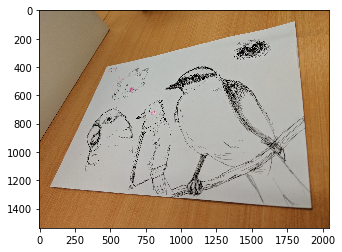

In [2]:
imagem = cv2.cvtColor(cv2.imread("foto-documento.jpg", 1), cv2.COLOR_BGR2RGB)
plt.imshow(imagem)
plt.show()

In [3]:
# Item 1
orig = [
    # Coloque os pontos aqui
    [478,   396],
    [1808,   78],
    [1918, 1393],
    [78,   1246]
]
orig = np.asarray(orig)

In [4]:
# Item 2
dest = [
    # Coloque os pontos correspondentes aqui
    [0,       0],
    [1684,    0],
    [1684, 1190],
    [0,    1190]
]
dest = np.asarray(dest)

In [5]:
# Item 3
def find_homography(orig, dest):
    x1 = orig[0][0]
    y1 = orig[0][1]
    x2 = orig[1][0]
    y2 = orig[1][1]
    x3 = orig[2][0]
    y3 = orig[2][1]
    x4 = orig[3][0]
    y4 = orig[3][1]
    
    x1l = dest[0][0]
    y1l = dest[0][1]
    x2l = dest[1][0]
    y2l = dest[1][1]
    x3l = dest[2][0]
    y3l = dest[2][1]
    x4l = dest[3][0]
    y4l = dest[3][1]
    
    small = np.array([
        [x1l],[y1l],[x2l],[y2l],[x3l],[y3l],[x4l],[y3l]
    ])
    
    big = np.array([
        [x1, y1, 1, 0, 0, 0, -(x1*x1l), -(y1*x1l)],
        [0, 0, 0, x1, y1, 1, -(x1*y1l), -(y1*y1l)],
        [x2, y2, 1, 0, 0, 0, -(x2*x2l), -(y2*x2l)],
        [0, 0, 0, x2, y2, 1, -(x2*y2l), -(y2*y2l)],
        [x3, y3, 1, 0, 0, 0, -(x3*x3l), -(y3*x3l)],
        [0, 0, 0, x3, y3, 1, -(x3*y3l), -(y3*y3l)],
        [x4, y4, 1, 0, 0, 0, -(x4*x4l), -(y4*x4l)],
        [0, 0, 0, x4, y4, 1, -(x4*y4l), -(y4*y4l)],
    ])
    result = np.linalg.solve(big, small)
    result = np.append(result, [1])
    return result.reshape((3,3))

In [6]:
# Item 4
# Verifique o resultado da sua função find_homography comparando com a implementação do OpenCV
homography = find_homography(orig, dest)
print("Minha implementação: \n", homography)
print("##################################")
opencv_homography = cv2.findHomography(orig, dest)[0]
print("OpenCV: \n", opencv_homography)


print("\n\nAs matrizes são iguais? \n R:", np.allclose(homography, opencv_homography[:8]))

Minha implementação: 
 [[ 4.27434594e+00  2.01145691e+00 -2.83967430e+03]
 [ 1.02794511e+00  4.29926730e+00 -2.19386762e+03]
 [ 1.04706155e-03  1.31918671e-03  1.00000000e+00]]
##################################
OpenCV: 
 [[ 4.27434594e+00  2.01145691e+00 -2.83967430e+03]
 [ 1.02794511e+00  4.29926730e+00 -2.19386762e+03]
 [ 1.04706155e-03  1.31918671e-03  1.00000000e+00]]


As matrizes são iguais? 
 R: True


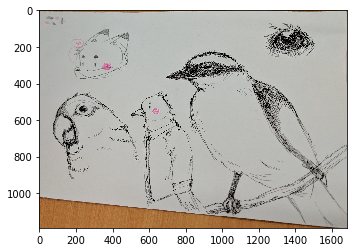

In [7]:
# Item 5
# Crie a imagem final aqui
height = 1190
width = 1684

inv_homography = find_homography(dest, orig)
imagem_original = cv2.cvtColor(cv2.imread("foto-documento.jpg", 1), cv2.COLOR_BGR2RGB)
imagem_cortada = np.zeros((height, width, 3), dtype = np.uint8)

for j in range(height):
    for i in range(width):
        ponto = np.array([i, j, 1]).reshape((3,1))
        resultado = (inv_homography @ ponto)
        resultado = resultado / resultado[2]
        x, y = int(resultado[0]), int(resultado[1])
        imagem_cortada[j, i, :] = imagem_original[y, x, :]
        
plt.imshow(imagem_cortada)
plt.show()

Percorra cada pixel dessa imagem aplicando a homografia inversa para descobrir o pixel original e preencha a imagem de destino com aquele pixel (lembre-se da atividade da primeira aula deste módulo). Apresente a imagem resultante neste notebook.

## Referências

- Multiple View Geometry in Computer Vision. Hartley, R. e Zisserman, A. Capítulo 2.